#Index - 190494A
#Name - Ranasinghe K K H

#1

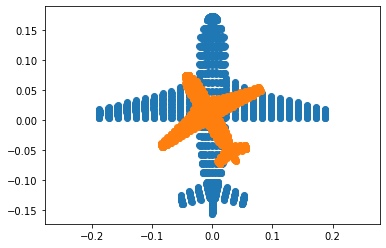

In [1]:
import numpy as np
from plyfile import PlyData, PlyElement
import matplotlib.pyplot as plt

pcd = PlyData.read('airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis=0)
points = points - np.mean(points, axis = 1).reshape(3,1)
ones  = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis = 0)

R = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
K = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
t = np.array([[0], [0], [-4000]])

P1 = K @ np.concatenate((R, t), axis = 1)

R = np.array([[0.866, -0.5, 0],
              [0.5, 0.866, 0],
              [0, 0 ,1]])
K = np.array([[0.5, 0, 0],
              [0, 0.5, 0],
              [0, 0, 1]])
t = np.array([[0], [0], [-4000]])

P2 = K @ np.concatenate((R, t), axis = 1)
x1 = P1 @ X
x2 = P2 @ X
x1 = x1/x1[2,:]
x2 = x2/x2[2,:]

fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.scatter(x1[0,:], x1[1,:])
ax.scatter(x2[0,:], x2[1,:])
ax.axis('equal')
plt.show()

Text(0.5, 0, 'z')

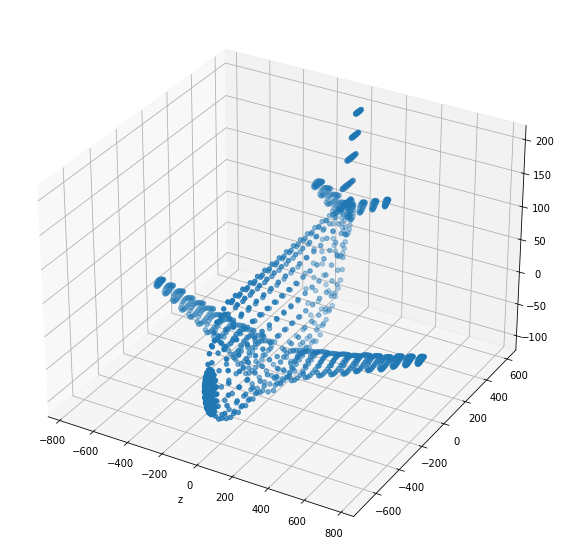

In [3]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[0,:], points[1,:], points[2,:])
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')

#3

Item 1 area in pixel = 59143
Item 1 area in mm^2 = 2318.642172
Item 2 area in pixel = 59211
Item 2 area in mm^2 = 2321.3080440000003


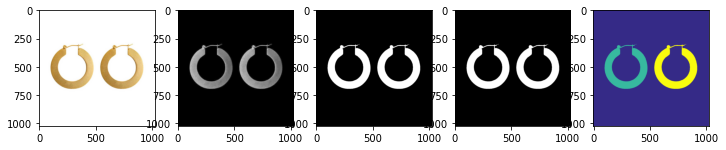

In [15]:
import cv2 as cv
import numpy as np

im = cv.imread('earrings.jpg', cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
th, bw = cv.threshold(hsv[:,:,1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'), cv.COLORMAP_PARULA) 

Z = 720
f = 8
for i, s in enumerate(stats):
    if  i != 0:
        print('Item', i,'area in pixel =', s[4])
        print('Item', i,'area in mm^2 =', s[4]*(2.2e-3)**2*(Z**2)/(f**2))


im=cv.cvtColor(im,cv.COLOR_BGR2RGB)
hsv=cv.cvtColor(hsv[:,:, 1],cv.COLOR_GRAY2RGB)
opened=cv.cvtColor(opened,cv.COLOR_BGR2RGB)
colormapped=cv.cvtColor(colormapped,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,5,figsize=(12,10))

ax[0].imshow(im)
ax[1].imshow(hsv)
ax[2].imshow(bw,cmap='gray')
ax[3].imshow(opened)
ax[4].imshow(colormapped)